In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 29s 3us/step


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

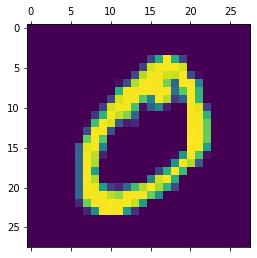

In [9]:
plt.matshow(x_train[1])

In [13]:
y_train[1]

0

In [23]:
x_train=x_train/255
x_test=x_test/255

In [24]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)

In [25]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [26]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4677 - accuracy: 0.8780
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3037 - accuracy: 0.9156
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2839 - accuracy: 0.9202
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9242
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2669 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2614 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9282
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2555 - accuracy: 0.9294
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2529 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.251

In [27]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2660 - accuracy: 0.9269


[0.2660443186759949, 0.9269000291824341]

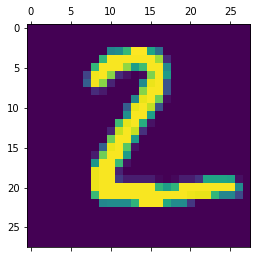

In [39]:
plt.matshow(x_test[1])

In [35]:
y_pred=model.predict(x_test_flatten)

313/313 [==============================] - 0s 1ms/step


In [36]:
import numpy as np

In [40]:
y_pred[1]

array([2.7145717e-01, 3.6679548e-03, 9.9972719e-01, 1.3843967e-01,
       1.0957200e-11, 7.4711150e-01, 8.9335924e-01, 6.5348105e-16,
       4.6648908e-02, 3.1514270e-12], dtype=float32)

In [41]:
np.argmax(y_pred[1])

2

In [42]:
y_pred_labels=[np.argmax(i) for i in y_pred]

In [43]:
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [44]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

In [45]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 957,    0,    2,    2,    0,    7,    9,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    1,    4,    2,   10,    0],
       [   4,    8,  941,   14,    8,    3,   11,    8,   30,    5],
       [   1,    0,   23,  928,    2,   21,    2,    8,   14,   11],
       [   1,    1,    6,    1,  916,    0,    9,    4,    7,   37],
       [   9,    2,    3,   33,   10,  781,   18,    3,   25,    8],
       [  11,    3,   10,    1,    7,    9,  915,    1,    1,    0],
       [   1,    7,   25,    9,    8,    1,    0,  933,    1,   43],
       [   8,    8,    9,   29,    8,   27,   13,   10,  846,   16],
       [   9,    8,    2,    9,   23,    6,    0,    9,    4,  939]])>

In [47]:
import seaborn as sns

<AxesSubplot:>

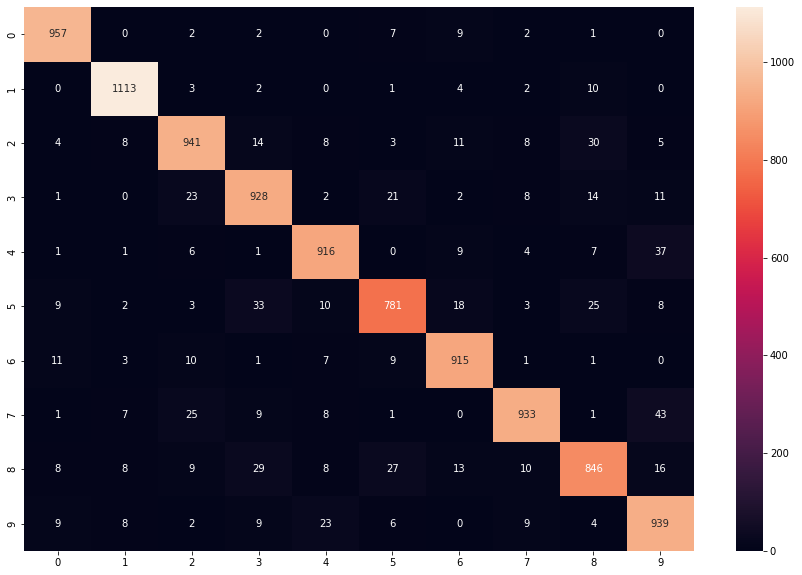

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt="d")

In [56]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,), activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train_flatten, y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2773 - accuracy: 0.9217
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9627
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0887 - accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0665 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0536 - accuracy: 0.9838
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0431 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0360 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0249 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.020

In [57]:
model.evaluate(x_test_flatten,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0859 - accuracy: 0.9766


[0.08594956994056702, 0.9765999913215637]

In [59]:
y_pred=model.predict(x_test_flatten)
y_pred_labels=[np.argmax(i) for i in y_pred]

313/313 [==============================] - 1s 2ms/step


In [60]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)

<AxesSubplot:>

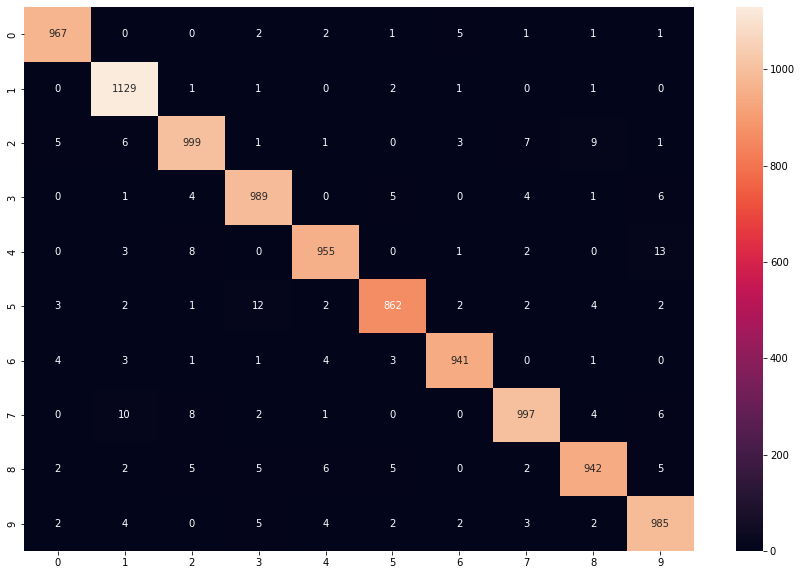

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt="d")

In [65]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(x_train, y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2675 - accuracy: 0.9244
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1207 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0636 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9843
